In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from scipy.io import loadmat as loadmat
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

In [3]:
%matplotlib inline

In [12]:
df = pd.read_csv('elsec15.csv', low_memory=False)

In [13]:
df

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400
5,1,1500500100000,BLOUNT COUNTY SCHOOL DISTRICT,1009,142,13820,3,0100420,15,8082,...,0,11123,0,980,10143,0,0,843,947,22610
6,1,1500500200000,ONEONTA CITY SCHOOL DISTRICT,1009,142,13820,3,0102550,15,1485,...,0,2598,0,248,2350,0,0,2190,814,1965
7,1,1500600100000,BULLOCK COUNTY SCHOOL DISTRICT,1011,N,N,3,0100480,15,1519,...,0,4150,0,334,3816,0,0,324,0,1177
8,1,1500700100000,BUTLER COUNTY SCHOOL DISTRICT,1013,N,N,3,0100510,15,3191,...,0,28128,31858,32248,27738,0,0,522,3845,3456
9,1,1500800200000,ANNISTON CITY SCHOOL DISTRICT,1015,N,11500,3,0100090,15,2141,...,0,2448,0,51,2397,0,0,1652,673,0


In [15]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [16]:
df.shape

(14376, 141)

In [17]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [19]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

In [106]:
useful = df[['STATE', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV']]

In [28]:
spending = df[['TCURELSC', 'TCURINST', 'TCURSSVC', 'TCUROTH' ]]

In [107]:
clean_useful = useful.dropna()

In [38]:
clean_useful.head()

,STATE,YRDATA,TOTALREV,TFEDREV,TSTREV
0,1,15,79665,7574,53244
1,1,15,330317,23602,143282
2,1,15,10519,2518,5632
3,1,15,26076,3374,16048
4,1,15,31825,3586,21687


In [68]:
clean_useful.describe()

,STATE,YRDATA,TOTALREV,TFEDREV,TSTREV
count,14376.000000,14376.0,1.437600e+04,1.437600e+04,1.437600e+04
mean,26.801336,15.0,4.546951e+04,3.708038e+03,2.105122e+04
std,13.894331,0.0,2.590623e+05,2.021328e+04,1.125639e+05
min,1.000000,15.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,15.000000,15.0,5.241500e+03,2.920000e+02,2.132500e+03
50%,27.000000,15.0,1.402300e+04,8.470000e+02,6.516000e+03
75%,38.000000,15.0,3.791375e+04,2.433500e+03,1.667925e+04
max,51.000000,15.0,2.543738e+07,1.307783e+06,9.837509e+06


In [40]:
clean_spending = spending.dropna()

In [41]:
clean_spending.head()

,TCURELSC,TCURINST,TCURSSVC,TCUROTH
0,72872,44085,23217,5570
1,269928,155668,99682,14578
2,9957,5249,3835,873
3,24232,14887,7494,1851
4,29133,16019,10822,2292


In [42]:
clean_spending.describe()

,TCURELSC,TCURINST,TCURSSVC,TCUROTH
count,1.437600e+04,1.437600e+04,1.437600e+04,14376.000000
mean,3.909932e+04,2.394922e+04,1.352417e+04,1625.927309
std,2.401800e+05,1.777658e+05,5.894857e+04,7558.732209
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.437000e+03,2.508750e+03,1.577000e+03,170.000000
50%,1.179900e+04,6.929000e+03,4.279500e+03,470.000000
75%,3.228275e+04,1.913625e+04,1.153675e+04,1250.000000
max,2.426924e+07,1.903582e+07,4.694906e+06,538505.000000


In [48]:
spending = clean_useful['TOTALREV']
revenue = clean_spending['TCURELSC']

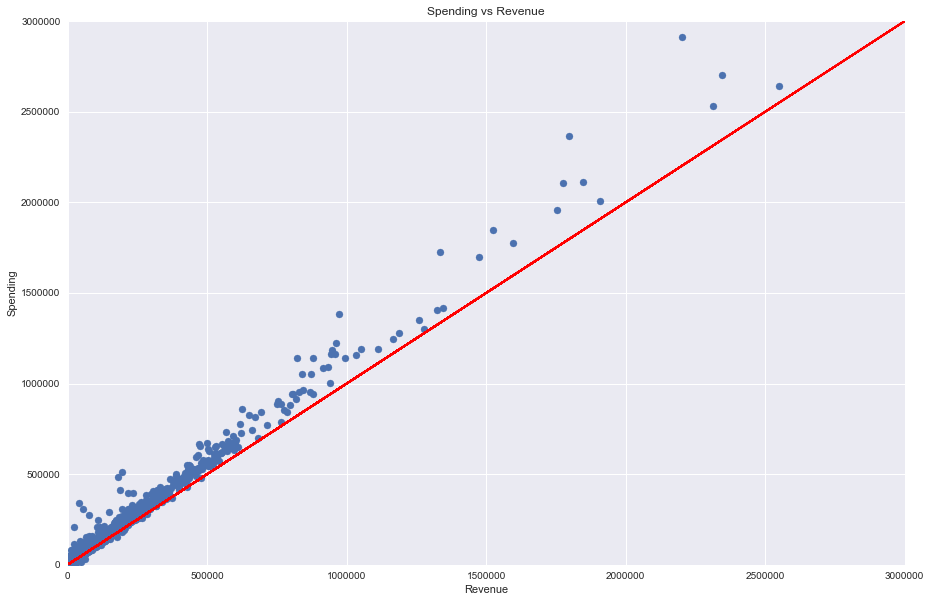

In [111]:
plt.figure(1)
plt.figure(figsize=(15,10))
plt.scatter(revenue, spending)
myOLS_points = sm.OLS(revenue,revenue).fit()
plt.plot(revenue, myOLS_points.predict(revenue), color = 'red')
plt.title("Spending vs Revenue")
plt.xlabel("Revenue")
plt.xlim([0, 3*10e5])
plt.ylim([0, 3*10e5])
plt.ylabel("Spending")
plt.show()
plt.close()


In [65]:
clean_useful.head()

,STATE,YRDATA,TOTALREV,TFEDREV,TSTREV
0,1,15,79665,7574,53244
1,1,15,330317,23602,143282
2,1,15,10519,2518,5632
3,1,15,26076,3374,16048
4,1,15,31825,3586,21687


In [91]:
cal = clean_useful.groupby('STATE')['TSTREV'].sum()[5]
cal

42360470

In [92]:
mass= clean_useful.groupby('STATE')['TSTREV'].sum()[22]
mass

6808436

In [93]:
new_mexico= clean_useful.groupby('STATE')['TSTREV'].sum()[32]
new_mexico

2595682

In [94]:
ohio= clean_useful.groupby('STATE')['TSTREV'].sum()[36]
ohio

10169760

In [95]:
new_york= clean_useful.groupby('STATE')['TSTREV'].sum()[33]
new_york

25900858

In [101]:
rhode_island= clean_useful.groupby('STATE')['TSTREV'].sum()[40]
rhode_island

908963

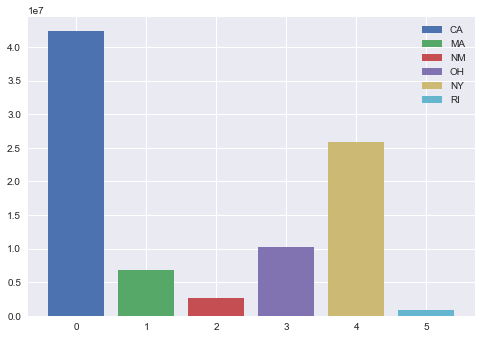

In [114]:
plt.bar(0, cal, label='CA')
plt.bar(1, mass, label='MA')
plt.bar(2, new_mexico, label='NM')
plt.bar(3, ohio, label='OH')
plt.bar(4, new_york, label='NY')
plt.bar(5, rhode_island, label='RI')
plt.legend()
plt.show()

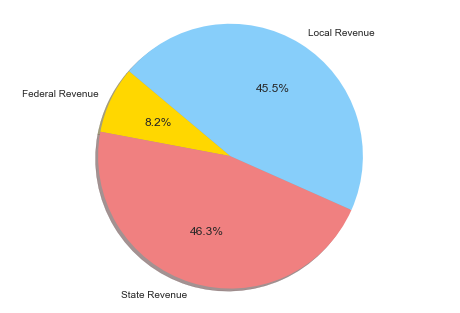

In [108]:
labels = 'Federal Revenue', 'State Revenue', 'Local Revenue'
sizes = [sum(clean_useful['TFEDREV']), sum(clean_useful['TSTREV']), sum(clean_useful['TLOCREV'])]
colors = ['gold','lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [46]:
!conda install seaborn --yes

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/kevinliu743/anaconda3:
#
seaborn                   0.7.1                    py34_0  


In [47]:
import seaborn as sns

In [128]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    if (y.size != 0) and (results.size == y.size):
        score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
        return score[0]
    else:
        return 0

In [213]:
rev = clean_useful['TOTALREV'][:1000].dropna()
spend = clean_spending['TCURELSC'][:1000].dropna()

In [214]:
rev = rev.reshape(1000, 1)


/Users/kevinliu743/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [215]:
spend.size

1000

In [216]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(rev,spend)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [211]:
lr = LogisticRegression()
X = rev
y = spend
lr.fit(X, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)
prob = lr.predict_proba(X[0][0])

/Users/kevinliu743/anaconda3/lib/python3.4/site-packages/sklearn/linear_model/base.py:239: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [212]:
prob[0][0]

1.642198990102958e-70